In [10]:
import sys
import os
from pathlib import Path

import pandas as pd

project_root = str(Path(os.getcwd()).parent)
if project_root not in sys.path:
    sys.path.append(project_root)


from utils.custom_types import StorageRegion
from utils.plots import EDAPlots


In [3]:
ANALYSIS_REGION = StorageRegion.EAST

In [13]:
raw_features_df = pd.read_csv(f"../data/{ANALYSIS_REGION.name}_data_raw.csv").astype({"period": "datetime64[ns]"})
raw_features_df.head()

,period,NG_Power_Gen,NG_Seasonal_Power_Gen,NG_Commercial_Usage,NG_Vehicle_Fuel_Usage,NG_Delivery_Usage,NG_Industrial_Usage,NG_Residential_Usage,Heating_Days,Cooling_Days,NG_Gross_Withdrawls,EAST_NG_Storage_BCF
0,2010-01-01,398.01873,-16.045804,217.993757,1.30281,1058.755463,99.213319,342.231009,549.000000,1.000000,280.869927,769
1,2010-01-08,398.01873,-16.712684,217.993757,1.30281,1058.755463,99.213319,342.231009,703.714286,0.000000,280.869927,703
2,2010-01-15,398.01873,-16.356354,217.993757,1.30281,1058.755463,99.213319,342.231009,699.285714,0.000000,280.869927,642
3,2010-01-22,398.01873,-14.467200,217.993757,1.30281,1058.755463,99.213319,342.231009,483.142857,2.285714,280.869927,616
4,2010-01-29,398.01873,-12.578046,217.993757,1.30281,1058.755463,99.213319,342.231009,520.428571,1.714286,280.869927,582


In [14]:
cols = raw_features_df.columns.tolist()
non_fundie_cols = ["period", "EAST_NG_Storage_BCF", "Heating_Days", "Cooling_Days", "NG_Seasonal_Power_Gen"]
supply_cols = ["NG_Gross_Withdrawls"]
demand_cols = [col for col in cols if col not in non_fundie_cols and col not in supply_cols]
demand_cols

['NG_Power_Gen',
 'NG_Commercial_Usage',
 'NG_Vehicle_Fuel_Usage',
 'NG_Delivery_Usage',
 'NG_Industrial_Usage',
 'NG_Residential_Usage']

In [18]:
engineered_features_df = raw_features_df.assign(
    Storage_t1 = lambda x: x['EAST_NG_Storage_BCF'].shift(1),
    Storage_t2 = lambda x: x['EAST_NG_Storage_BCF'].shift(2),
    Storage_4Wk_Avg = lambda x: x['EAST_NG_Storage_BCF'].rolling(window=4).mean(),
    Heating_Days_4Wk_Avg = lambda x: x['Heating_Days'].rolling(window=4).mean(),
    Cooling_Days_4Wk_Avg = lambda x: x['Cooling_Days'].rolling(window=4).mean(),
)
engineered_features_df

,period,NG_Power_Gen,NG_Seasonal_Power_Gen,NG_Commercial_Usage,NG_Vehicle_Fuel_Usage,NG_Delivery_Usage,NG_Industrial_Usage,NG_Residential_Usage,Heating_Days,Cooling_Days,NG_Gross_Withdrawls,EAST_NG_Storage_BCF,Storage_t1,Storage_t2,Storage_4Wk_Avg,Heating_Days_4Wk_Avg,Cooling_Days_4Wk_Avg
0,2010-01-01,398.018730,-16.045804,217.993757,1.302810,1058.755463,99.213319,342.231009,549.000000,1.000000,280.869927,769,NaN,NaN,NaN,NaN,NaN
1,2010-01-08,398.018730,-16.712684,217.993757,1.302810,1058.755463,99.213319,342.231009,703.714286,0.000000,280.869927,703,769.0,NaN,NaN,NaN,NaN
2,2010-01-15,398.018730,-16.356354,217.993757,1.302810,1058.755463,99.213319,342.231009,699.285714,0.000000,280.869927,642,703.0,769.0,NaN,NaN,NaN
3,2010-01-22,398.018730,-14.467200,217.993757,1.302810,1058.755463,99.213319,342.231009,483.142857,2.285714,280.869927,616,642.0,703.0,682.50,608.785714,0.821429
4,2010-01-29,398.018730,-12.578046,217.993757,1.302810,1058.755463,99.213319,342.231009,520.428571,1.714286,280.869927,582,616.0,642.0,635.75,601.642857,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,2024-12-06,589.473465,-15.225903,211.904266,2.351717,1253.660770,118.476587,331.450572,596.571429,0.000000,4761.273673,856,914.0,929.0,907.50,401.571429,3.928571
780,2024-12-13,589.473465,-16.328982,211.904266,2.351717,1253.660770,118.476587,331.450572,464.857143,1.000000,4761.273673,822,856.0,914.0,880.25,439.107143,1.464286
781,2024-12-20,589.473465,-16.629175,211.904266,2.351717,1253.660770,118.476587,331.450572,468.428571,4.000000,4761.273673,792,822.0,856.0,846.00,479.178571,1.607143
782,2024-12-27,589.473465,-16.214187,211.904266,2.351717,1253.660770,118.476587,331.450572,643.428571,0.714286,4761.273673,745,792.0,822.0,803.75,543.321429,1.428571


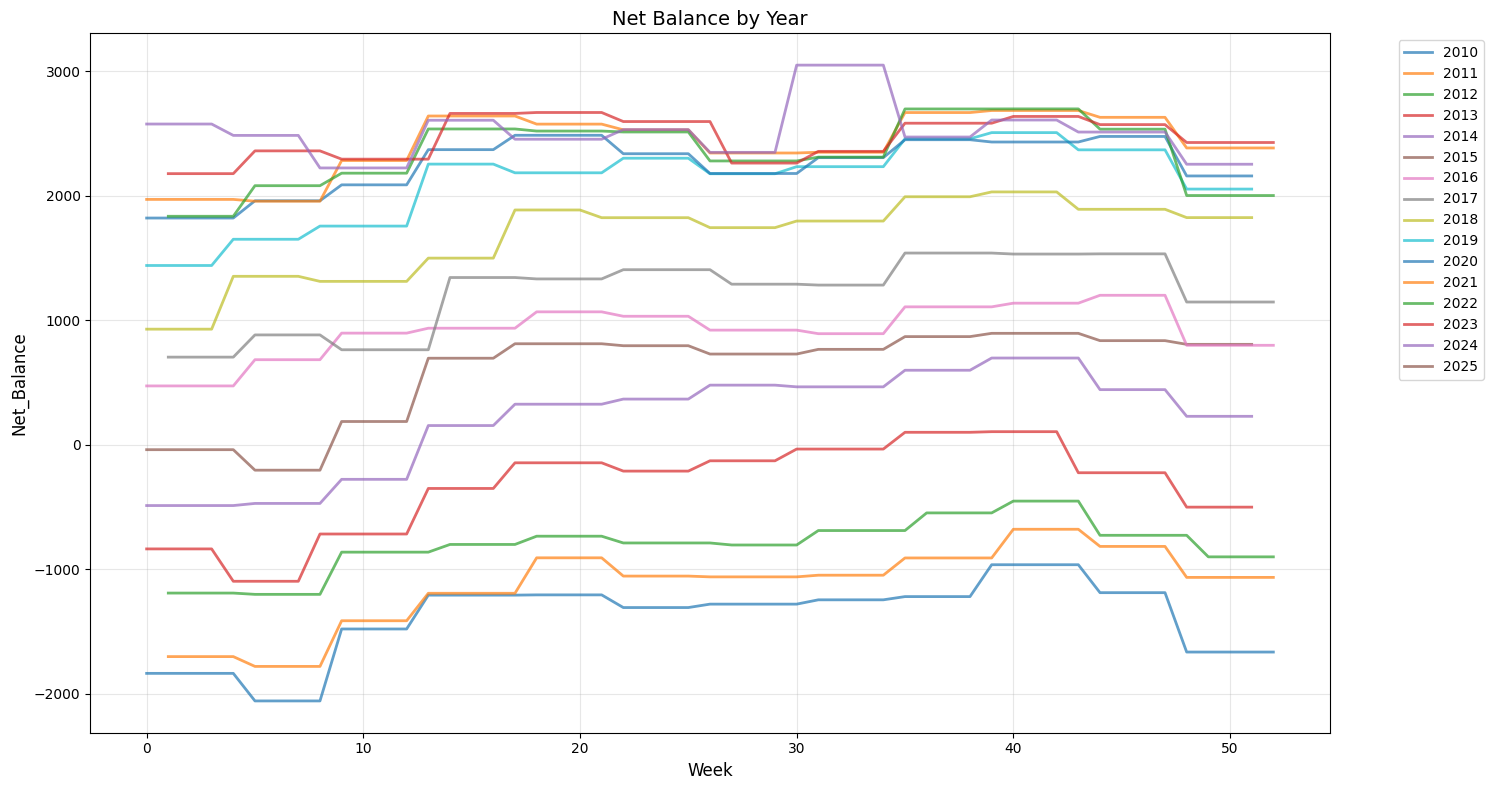

In [17]:
engineered_features_df["Week"] = engineered_features_df["period"].dt.strftime("%U").astype(int)
engineered_features_df["Year"] = engineered_features_df["period"].dt.year
EDAPlots.generate_year_plot(engineered_features_df, "Week", "Net_Balance", "Net Balance by Year")

In [20]:
engineered_features_df.dropna().to_csv(f"../data/{ANALYSIS_REGION.name}_data_engineered.csv", index=False)